*   Nama : Yullase Pratiwi
*   NIM  : 24/550766/PPA/06955

**Down Sampling (Max, Median, Mean): Perhitungan Dengan Matriks**

In [26]:
# Matrix 4x4
M = [
    [3, 7, 8, 2],
    [6, 5, 9, 4],
    [8, 3, 2, 1],
    [0, 9, 3, 2]
]

# Setup
def round_half_up(x):

    i = int(x)
    return i + 1 if x - i >= 0.5 else i

def mean_of_list(values):
    s = 0
    for v in values:
        s += v
    return s / len(values)

def median_of_list(values):

# untuk 4 elemen: median
    arr = values[:]

# sorting
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    mid_left  = arr[len(arr)//2 - 1]
    mid_right = arr[len(arr)//2]
    return (mid_left + mid_right) / 2

def print_matrix(mat, title=None):
    if title:
        print(title)
    for row in mat:
        print(" ".join(str(x) for x in row))
    print()

# Downsampling : Max
def downsample_4x4_to_2x2_max(M):
    # blok: (0:2,0:2), (0:2,2:4), (2:4,0:2), (2:4,2:4)
    out = [[0, 0], [0, 0]]
    blocks = [
        (0, 0), (0, 2),
        (2, 0), (2, 2)
    ]
    k = 0
    for bi, bj in blocks:
        vals = [
            M[bi][bj],   M[bi][bj+1],
            M[bi+1][bj], M[bi+1][bj+1]
        ]

        m = vals[0]
        for v in vals[1:]:
            if v > m:
                m = v
        out[k//2][k%2] = m
        k += 1
    return out

# Downsampling : Median
def downsample_4x4_to_2x2_median(M):
    out = [[0, 0], [0, 0]]
    blocks = [
        (0, 0), (0, 2),
        (2, 0), (2, 2)
    ]
    k = 0
    for bi, bj in blocks:
        vals = [
            M[bi][bj],   M[bi][bj+1],
            M[bi+1][bj], M[bi+1][bj+1]
        ]
        med = median_of_list(vals)
        out[k//2][k%2] = round_half_up(med)
        k += 1
    return out

# Downsampling : Mean
def downsample_4x4_to_2x2_mean(M):
    out = [[0, 0], [0, 0]]
    blocks = [
        (0, 0), (0, 2),
        (2, 0), (2, 2)
    ]
    k = 0
    for bi, bj in blocks:
        vals = [
            M[bi][bj],   M[bi][bj+1],
            M[bi+1][bj], M[bi+1][bj+1]
        ]
        avg = mean_of_list(vals)
        out[k//2][k%2] = round_half_up(avg)
        k += 1
    return out

# Visualisasi
print_matrix(M, title="Matriks 4x4 (input):")

max_ds    = downsample_4x4_to_2x2_max(M)
median_ds = downsample_4x4_to_2x2_median(M)
mean_ds   = downsample_4x4_to_2x2_mean(M)

print_matrix(max_ds,    title="Downsampling 2x2 - MAX:")
print_matrix(median_ds, title="Downsampling 2x2 - MEDIAN (dibulatkan):")
print_matrix(mean_ds,   title="Downsampling 2x2 - MEAN (dibulatkan):")


Matriks 4x4 (input):
3 7 8 2
6 5 9 4
8 3 2 1
0 9 3 2

Downsampling 2x2 - MAX:
7 9
9 3

Downsampling 2x2 - MEDIAN (dibulatkan):
6 6
6 2

Downsampling 2x2 - MEAN (dibulatkan):
5 6
5 2



**Up Sampling (Nearest Neighbor, Bilinear, Bicubic): Perhitungan Dengan Matriks**

In [27]:
#SetUp
def round_half_up(x):
    i = int(x)
    return i + 1 if x - i >= 0.5 else i

def clamp(v, lo, hi):
    if v < lo: return lo
    if v > hi: return hi
    return v

def print_matrix(mat, title=None, as_int=False, precision=2):
    if title:
        print(title)
    for row in mat:
        if as_int:
            print(" ".join(str(round_half_up(v)) for v in row))
        else:
            print(" ".join(f"{v:.{precision}f}" for v in row))
    print()


# UPSAMPLING NEAREST NEIGHBOR
def upsample_nearest(src, scale=2):
    h = len(src)
    w = len(src[0])
    H = h * scale
    W = w * scale
    dst = [[0.0 for _ in range(W)] for _ in range(H)]
    for y in range(H):
        ny = y // scale
        for x in range(W):
            fx = x / scale
            nx = clamp(int(fx + 0.5), 0, w - 1)
            dst[y][x] = src[ny][nx]
    return dst


# UPSAMPLING BILINEAR
def upsample_bilinear(src, scale=2):
    h = len(src)
    w = len(src[0])
    H = h * scale
    W = w * scale
    dst = [[0.0 for _ in range(W)] for _ in range(H)]
    for y in range(H):
        fy = y / scale
        y0 = int(fy)
        y1 = clamp(y0 + 1, 0, h - 1)
        ty = fy - y0
        for x in range(W):
            fx = x / scale
            x0 = int(fx)
            x1 = clamp(x0 + 1, 0, w - 1)
            tx = fx - x0

            Q00 = src[y0][x0]
            Q10 = src[y0][x1]
            Q01 = src[y1][x0]
            Q11 = src[y1][x1]

            top = (1 - tx) * Q00 + tx * Q10
            bot = (1 - tx) * Q01 + tx * Q11
            dst[y][x] = (1 - ty) * top + ty * bot
    return dst


# UPSAMPLING BICUBIC
def cubic_weight(a, t):
    t = abs(t)
    if t < 1:
        return (a + 2) * t**3 - (a + 3) * t**2 + 1
    elif t < 2:
        return a * t**3 - 5*a * t**2 + 8*a * t - 4*a
    else:
        return 0.0

def upsample_bicubic(src, scale=2, a=-0.5):
    h = len(src)
    w = len(src[0])
    H = h * scale
    W = w * scale
    dst = [[0.0 for _ in range(W)] for _ in range(H)]

    for y in range(H):
        fy = y / scale
        y0 = int(fy)
        wy = [cubic_weight(a, (y0 + (i - 1)) - fy) for i in range(4)]
        swy = sum(wy)
        if swy != 0: wy = [v / swy for v in wy]

        for x in range(W):
            fx = x / scale
            x0 = int(fx)
            wx = [cubic_weight(a, (x0 + (j - 1)) - fx) for j in range(4)]
            swx = sum(wx)
            if swx != 0: wx = [v / swx for v in wx]

            val = 0.0
            for i in range(4):
                sy = clamp(y0 + (i - 1), 0, h - 1)
                row_sum = 0.0
                for j in range(4):
                    sx = clamp(x0 + (j - 1), 0, w - 1)
                    row_sum += src[sy][sx] * wx[j]
                val += wy[i] * row_sum
            dst[y][x] = val
    return dst


# Visualisasi
src_2x2 = [
    [3, 2],
    [4, 5]
]

S = 2  # skala 2x (2x2 -> 4x4)

nn = upsample_nearest(src_2x2, scale=S)
bl = upsample_bilinear(src_2x2, scale=S)
bc = upsample_bicubic(src_2x2,  scale=S)

print_matrix(src_2x2, "Sumber 2x2 (float):")
print_matrix(src_2x2, "Sumber 2x2 (dibulatkan):", as_int=True)


print_matrix(nn, "Nearest Neighbor 4x4 (dibulatkan):", as_int=True)
print_matrix(bl, "Bilinear 4x4 (dibulatkan):", as_int=True)
print_matrix(bc, "Bicubic 4x4 (dibulatkan):", as_int=True)


Sumber 2x2 (float):
3.00 2.00
4.00 5.00

Sumber 2x2 (dibulatkan):
3 2
4 5

Nearest Neighbor 4x4 (dibulatkan):
3 2 2 2
3 2 2 2
4 5 5 5
4 5 5 5

Bilinear 4x4 (dibulatkan):
3 3 2 2
4 4 4 4
4 5 5 5
4 5 5 5

Bicubic 4x4 (dibulatkan):
3 3 2 2
4 4 4 4
4 5 5 5
4 5 5 5



**Down Sampling (Max, Median, Mean): Dengan Image**

Saving bunga.jpg to bunga (4).jpg
RGB shape: (455, 728, 3) | GRAY shape: (455, 728)
Input      : (455, 728)
Down MAX   : (113, 182)
Down MEAN  : (113, 182)
Down MEDIAN: (113, 182)


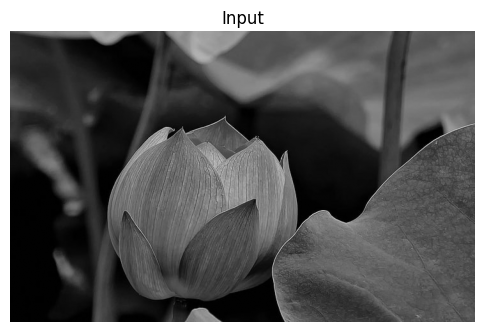

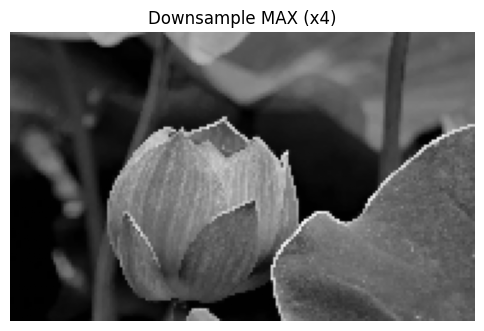

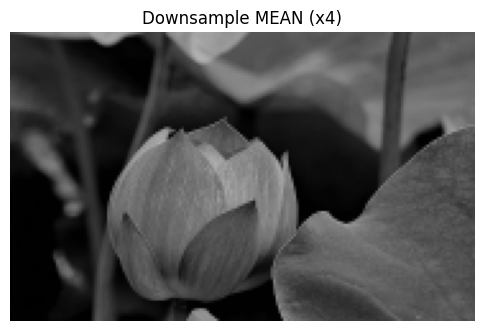

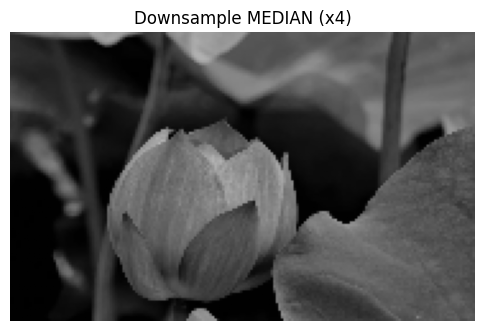

In [29]:


import numpy as np
import matplotlib.pyplot as plt
import cv2

# Konfigurasi
plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['image.cmap'] = 'gray'

def show(title, img):
    plt.figure()
    plt.title(title)
    if img.ndim == 2:
        plt.imshow(img, vmin=0, vmax=255)
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()


def to_uint8_half_up(x):



    x = np.clip(x, 0, 255)
    i = np.floor(x).astype(np.int32)
    frac = x - i
    i += (frac >= 0.5).astype(np.int32)
    return i.astype(np.uint8)

def _trim_to_factor(h, w, factor):

    return h - (h % factor), w - (w % factor)

def _block_reduce(img: np.ndarray, factor: int, reducer, is_median=False, use_half_up_round=False):

    if factor < 1:
        raise ValueError('factor harus >= 1')
    if factor == 1:
        return img.copy()

    if img.ndim == 2:  # GRAY
        H, W = img.shape
        Ht, Wt = _trim_to_factor(H, W, factor)
        x = img[:Ht, :Wt]

        # bentuk: (Ht/f, f, Wt/f, f)
        x = x.reshape(Ht//factor, factor, Wt//factor, factor)
        if is_median:
            out = np.median(x, axis=(1, 3))
        else:
            out = reducer(reducer(x, axis=3), axis=1)
        # casting
        if out.dtype.kind == 'f' and use_half_up_round:
            out = to_uint8_half_up(out)
        else:
            out = out.astype(np.uint8)
        return out

    elif img.ndim == 3:  # RGB
        H, W, C = img.shape
        Ht, Wt = _trim_to_factor(H, W, factor)
        x = img[:Ht, :Wt, :]
        # bentuk: (Ht/f, f, Wt/f, f, C)
        x = x.reshape(Ht//factor, factor, Wt//factor, factor, C)
        if is_median:
            out = np.median(x, axis=(1, 3))
        else:
            out = reducer(reducer(x, axis=3), axis=1)  # MAX/MEAN
        # casting
        if out.dtype.kind == 'f' and use_half_up_round:
            out = to_uint8_half_up(out)
        else:
            out = out.astype(np.uint8)
        return out

    else:
        raise ValueError('img harus 2D (gray) atau 3D (RGB)')


def downsample_max(img: np.ndarray, factor: int):

# Metode MAX
    return _block_reduce(img, factor, np.max, is_median=False, use_half_up_round=False)

def downsample_mean(img: np.ndarray, factor: int):

# Metode MEAN
    return _block_reduce(img, factor, np.mean, is_median=False, use_half_up_round=True)

def downsample_median(img: np.ndarray, factor: int):

# Metode MEDIAN
    return _block_reduce(img, factor, np.median, is_median=True, use_half_up_round=True)

# Upload
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]


bgr  = cv2.imread(image_path, cv2.IMREAD_COLOR)
if bgr is None:
    raise RuntimeError("Gagal membaca gambar. Pastikan file valid (jpg/png).")

rgb  = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
print('RGB shape:', rgb.shape, '| GRAY shape:', gray.shape)

# Parameter
down_factor = 4
use_color   = False


img_in = rgb if use_color else gray

# Hitung downsampling
down_max    = downsample_max(img_in, down_factor)
down_mean   = downsample_mean(img_in, down_factor)
down_median = downsample_median(img_in, down_factor)


print('Input      :', img_in.shape)
print('Down MAX   :', down_max.shape)
print('Down MEAN  :', down_mean.shape)
print('Down MEDIAN:', down_median.shape)

# Tampilkan
show('Input', img_in)
show(f'Downsample MAX (x{down_factor})', down_max)
show(f'Downsample MEAN (x{down_factor})', down_mean)
show(f'Downsample MEDIAN (x{down_factor})', down_median)



**Up Sampling (Nearest Neighbor, Bilinear, Bicubic): Dengan Image**


Saving bunga2.jpeg to bunga2 (1).jpeg
RGB shape: (4792, 3000, 3) | GRAY shape: (4792, 3000)
Input : (4792, 3000, 3)
NN    : (9584, 6000, 3)
Bilinear: (9584, 6000, 3)
Bicubic : (9584, 6000, 3)


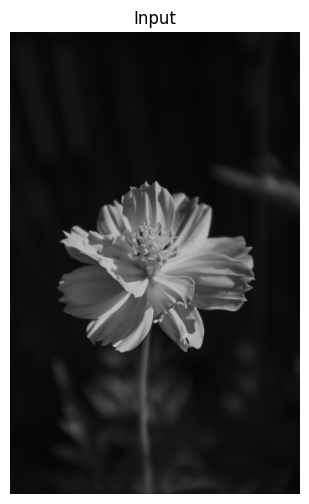

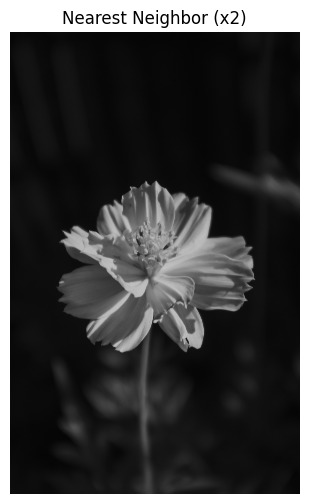

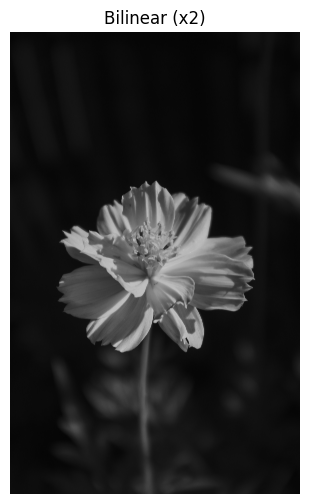

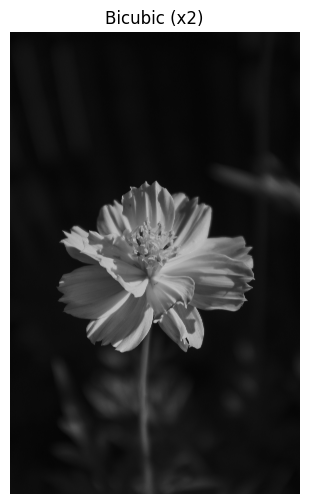

In [25]:

# Upsampling (Nearest, Bilinear, Bicubic) sesuai teori matriks
import numpy as np
import matplotlib.pyplot as plt
import cv2

plt.rcParams['figure.figsize'] = (6, 6)
plt.rcParams['image.cmap'] = 'gray'

def show(title, img):
    plt.figure()
    plt.title(title)
    if img.ndim == 2:
        plt.imshow(img, vmin=0, vmax=255)
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.show()


def to_uint8_half_up(x):
    x = np.clip(x, 0, 255)
    i = np.floor(x).astype(np.int32)
    frac = x - i
    i += (frac >= 0.5).astype(np.int32)
    return i.astype(np.uint8)

# UPSAMPLING NEAREST NEIGHBOR
def upsample_nearest(img: np.ndarray, scale: int):
    if scale < 1: raise ValueError("scale harus >= 1")
    if scale == 1: return img.copy()

    if img.ndim == 2:
        h, w = img.shape
        H, W = h * scale, w * scale
        ny = np.arange(H) // scale
        fx = np.arange(W) / scale
        nx = np.clip((fx + 0.5).astype(np.int64), 0, w - 1)  # bias ke kanan
        out = img[ny[:, None], nx[None, :]]
        return out.astype(np.uint8)

    elif img.ndim == 3:
        h, w, c = img.shape
        H, W = h * scale, w * scale
        ny = np.arange(H) // scale
        fx = np.arange(W) / scale
        nx = np.clip((fx + 0.5).astype(np.int64), 0, w - 1)
        out = img[ny[:, None], nx[None, :], :]
        return out.astype(np.uint8)

    else:
        raise ValueError("img harus 2D (gray) atau 3D (RGB)")

# UPSAMPLING BILINEAR
def upsample_bilinear(img: np.ndarray, scale: int):
    if scale < 1: raise ValueError("scale harus >= 1")
    if scale == 1: return img.copy()

    if img.ndim == 2:
        h, w = img.shape
        H, W = h * scale, w * scale

        fy = np.arange(H) / scale
        fx = np.arange(W) / scale

        y0 = np.floor(fy).astype(np.int64)
        x0 = np.floor(fx).astype(np.int64)
        y1 = np.clip(y0 + 1, 0, h - 1)
        x1 = np.clip(x0 + 1, 0, w - 1)

        ty = fy - y0
        tx = fx - x0

        Q00 = img[y0[:, None], x0[None, :]].astype(np.float32)
        Q10 = img[y0[:, None], x1[None, :]].astype(np.float32)
        Q01 = img[y1[:, None], x0[None, :]].astype(np.float32)
        Q11 = img[y1[:, None], x1[None, :]].astype(np.float32)

        top = (1 - tx)[None, :] * Q00 + tx[None, :] * Q10
        bot = (1 - tx)[None, :] * Q01 + tx[None, :] * Q11
        out = (1 - ty)[:, None] * top + ty[:, None] * bot

        return to_uint8_half_up(out)

    elif img.ndim == 3:
        h, w, c = img.shape
        H, W = h * scale, w * scale

        fy = np.arange(H) / scale
        fx = np.arange(W) / scale

        y0 = np.floor(fy).astype(np.int64)
        x0 = np.floor(fx).astype(np.int64)
        y1 = np.clip(y0 + 1, 0, h - 1)
        x1 = np.clip(x0 + 1, 0, w - 1)

        ty = fy - y0
        tx = fx - x0

        Q00 = img[y0[:, None], x0[None, :], :].astype(np.float32)  # (H,W,C)
        Q10 = img[y0[:, None], x1[None, :], :].astype(np.float32)
        Q01 = img[y1[:, None], x0[None, :], :].astype(np.float32)
        Q11 = img[y1[:, None], x1[None, :], :].astype(np.float32)

        top = (1 - tx)[None, :, None] * Q00 + tx[None, :, None] * Q10
        bot = (1 - tx)[None, :, None] * Q01 + tx[None, :, None] * Q11
        out = (1 - ty)[:, None, None] * top + ty[:, None, None] * bot

        return to_uint8_half_up(out)

    else:
        raise ValueError("img harus 2D (gray) atau 3D (RGB)")

# UPSAMPLING BICUBIC
def cubic_weight_vec(a, t):
    t = np.abs(t)
    w = np.zeros_like(t, dtype=np.float32)
    m1 = (t < 1)
    m2 = (t >= 1) & (t < 2)
    w[m1] = (a + 2) * t[m1]**3 - (a + 3) * t[m1]**2 + 1
    w[m2] = a * t[m2]**3 - 5*a * t[m2]**2 + 8*a * t[m2] - 4*a
    return w

def _normalize_rows(W):
    s = W.sum(axis=1, keepdims=True)
    s[s == 0] = 1.0
    return W / s

def upsample_bicubic(img: np.ndarray, scale: int, a: float = -0.5):
    if scale < 1: raise ValueError("scale harus >= 1")
    if scale == 1: return img.copy()

    if img.ndim == 2:
        h, w = img.shape
        H, W = h * scale, w * scale

        fy = np.arange(H) / scale
        fx = np.arange(W) / scale

        y0 = np.floor(fy).astype(np.int64)
        x0 = np.floor(fx).astype(np.int64)

        # Bobot wy (H, 4) dan wx (W, 4)
        wy = np.stack([cubic_weight_vec(a, (y0 + (i - 1)) - fy) for i in range(4)], axis=1).astype(np.float32)
        wx = np.stack([cubic_weight_vec(a, (x0 + (j - 1)) - fx) for j in range(4)], axis=1).astype(np.float32)
        wy = _normalize_rows(wy)
        wx = _normalize_rows(wx)


        sy = np.stack([np.clip(y0 + (i - 1), 0, h - 1) for i in range(4)], axis=1)  # (H,4)
        sx = np.stack([np.clip(x0 + (j - 1), 0, w - 1) for j in range(4)], axis=1)  # (W,4)

        out = np.zeros((H, W), dtype=np.float32)
        for i in range(4):

            tmp = np.zeros((H, W), dtype=np.float32)
            for j in range(4):
                tmp += img[sy[:, i][:, None], sx[:, j][None, :]].astype(np.float32) * wx[None, :, j]
            out += wy[:, i][:, None] * tmp

        return to_uint8_half_up(out)

    elif img.ndim == 3:
        h, w, c = img.shape
        H, W = h * scale, w * scale

        fy = np.arange(H) / scale
        fx = np.arange(W) / scale

        y0 = np.floor(fy).astype(np.int64)
        x0 = np.floor(fx).astype(np.int64)

        wy = np.stack([cubic_weight_vec(a, (y0 + (i - 1)) - fy) for i in range(4)], axis=1).astype(np.float32)
        wx = np.stack([cubic_weight_vec(a, (x0 + (j - 1)) - fx) for j in range(4)], axis=1).astype(np.float32)
        wy = _normalize_rows(wy)
        wx = _normalize_rows(wx)

        sy = np.stack([np.clip(y0 + (i - 1), 0, h - 1) for i in range(4)], axis=1)  # (H,4)
        sx = np.stack([np.clip(x0 + (j - 1), 0, w - 1) for j in range(4)], axis=1)  # (W,4)

        out = np.zeros((H, W, c), dtype=np.float32)
        for i in range(4):
            tmp = np.zeros((H, W, c), dtype=np.float32)
            for j in range(4):
                tmp += img[sy[:, i][:, None], sx[:, j][None, :], :].astype(np.float32) * wx[None, :, j][:, :, None]
            out += wy[:, i][:, None, None] * tmp

        return to_uint8_half_up(out)

    else:
        raise ValueError("img harus 2D (gray) atau 3D (RGB)")

# Visualisasi
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
if bgr is None:
    raise RuntimeError("Gagal membaca gambar. Pastikan file valid.")

rgb  = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
print("RGB shape:", rgb.shape, "| GRAY shape:", gray.shape)

# Parameter
scale     = 2
use_color = True   # True = RGB, False = Grayscale

img_in = rgb if use_color else gray

# Proses Pemanggilan
up_nn = upsample_nearest(img_in, scale)
up_bl = upsample_bilinear(img_in, scale)
up_bc = upsample_bicubic(img_in, scale, a=-0.5)

print("Input :", img_in.shape)
print("NN    :", up_nn.shape)
print("Bilinear:", up_bl.shape)
print("Bicubic :", up_bc.shape)

show("Input", img_in)
show(f"Nearest Neighbor (x{scale})", up_nn)
show(f"Bilinear (x{scale})", up_bl)
show(f"Bicubic (x{scale})", up_bc)

